<a href="https://colab.research.google.com/github/sabsabrina/Data-Science-Real-Projects-in-Python/blob/main/Predict_Stock_Price_using_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Time Series Data

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/dataset/BAJFINANCE.csv")
df.head()

Mounted at /content/drive


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [2]:
df.set_index('Date',inplace=True)

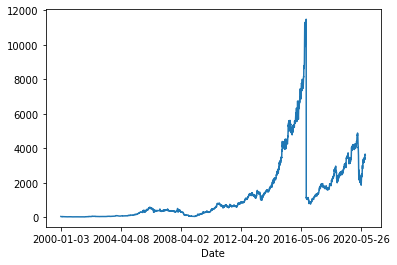

In [3]:
df['VWAP'].plot()

In [4]:
df.shape

(5070, 14)

In [5]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
df.shape

(2291, 14)

In [9]:
data=df.copy()

In [10]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

Data Preparation for Time Series Forecasting

In [11]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 = 3
window2 = 7

In [13]:
for feature in lag_features:
  data[feature +'rolling_mean_3'] = data[feature].rolling(window = window1).mean()
  data[feature +'rolling_mean_7'] = data[feature].rolling(window = window2).mean()

In [14]:
for feature in lag_features:
  data[feature +'rolling_std_3'] = data[feature].rolling(window = window1).std()
  data[feature +'rolling_std_7'] = data[feature].rolling(window = window2).std()

In [15]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [16]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [17]:
data.shape

(2291, 34)

In [18]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [21]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [22]:
training_data = data[0:1000]
test_data = data[1000:]

In [23]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,1.994715e+12,894.0,18626.0,0.5960,638.650000,638.592857,612.666667,615.050000,21368.666667,18663.142857,1.356553e+12,1.175452e+12,682.666667,614.142857,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,1.958588e+12,1360.0,12656.0,0.4098,646.750000,640.271429,617.516667,615.414286,29666.666667,22090.428571,1.886054e+12,1.393498e+12,1045.000000,606.142857,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,2.479856e+11,250.0,1745.0,0.4383,641.033333,638.692857,621.516667,614.842857,22039.333333,22263.571429,1.400430e+12,1.403765e+12,834.666667,580.142857,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,3.500088e+11,198.0,3717.0,0.6641,635.016667,637.428571,618.166667,614.835714,13487.666667,15716.428571,8.521943e+11,9.945331e+11,602.666667,589.142857,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,7.640851e+11,481.0,9021.0,0.7165,626.600000,634.857143,611.350000,612.942857,7389.333333,16737.000000,4.540265e+11,1.055761e+12,309.666667,619.571429,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-15,BAJFINANCE,EQ,4676.45,4681.25,4732.80,4654.00,4705.00,4715.30,4702.58,26787,1.259681e+13,2648.0,18339.0,0.6846,4739.633333,4633.957143,4563.133333,4471.371429,50543.000000,41104.571429,2.362658e+13,1.885133e+13,7378.000000,5679.857143,29.548660,109.326786,79.172302,113.847716,31248.969471,22844.071863,1.455539e+13,1.070953e+13,6362.161504,4151.761451
2015-06-16,BAJFINANCE,EQ,4715.30,4715.00,4720.00,4635.15,4696.50,4700.15,4672.66,22336,1.043685e+13,2786.0,12088.0,0.5412,4722.300000,4666.100000,4599.383333,4519.250000,29341.000000,39589.714286,1.373084e+13,1.825627e+13,3436.333333,5514.142857,9.559812,93.609312,78.839653,99.311434,8572.264053,23807.020034,3.983959e+12,1.109380e+13,1247.831052,4254.383207
2015-06-17,BAJFINANCE,EQ,4700.15,4702.50,4790.00,4696.80,4765.50,4776.20,4762.45,98150,4.674346e+13,16070.0,63537.0,0.6473,4747.600000,4706.128571,4661.983333,4560.921429,49091.000000,50146.142857,2.325904e+13,2.338932e+13,7168.000000,7358.857143,37.273047,73.350454,31.590835,104.494648,42544.587917,31130.723112,2.036676e+13,1.477668e+13,7709.666919,5636.900166


Apply Auto-Arima on Data

In [27]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 14.3 MB/s 
     |████████████████████████████████| 9.5 MB 71.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [28]:
from pmdarima import auto_arima

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
model = auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9124.472, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9412.450, Time=1.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9285.660, Time=1.40 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9175.471, Time=1.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15319.214, Time=1.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9149.751, Time=2.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9124.248, Time=2.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9173.787, Time=2.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9123.714, Time=1.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9124.531, Time=2.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9125.783, Time=2.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9121.731, Time=1.97 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9283.665, Time=1.34 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9122.547, Time=2.23 sec
 ARIMA(2,0,1)(0,0,0)[0]         

In [32]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [34]:
forecast = model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

In [35]:
test_data['Forecast_ARIMA']=forecast

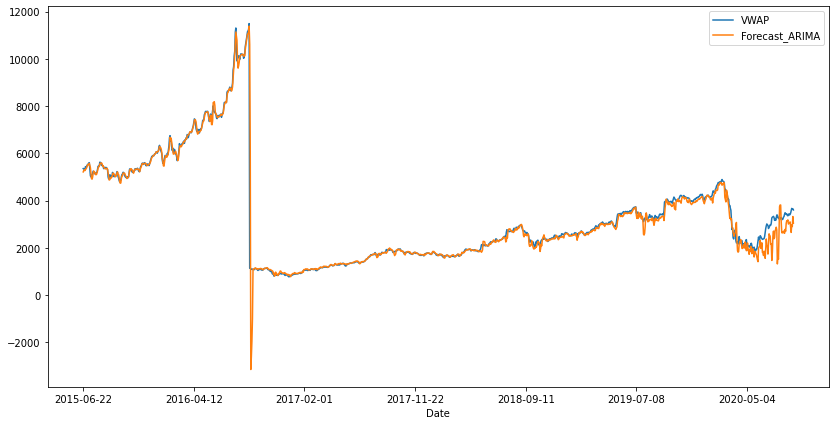

In [40]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

Evaluating Time Series Model

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

411.7625815010635

In [44]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

127.41375179033983